In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
gisstemp_global_file = '/Users/damienirving/Downloads/data/GLB.Ts+dSST.csv'
gisstemp_sh_file = '/Users/damienirving/Downloads/data/SH.Ts+dSST.csv'
gisstemp_nh_file = '/Users/damienirving/Downloads/data/NH.Ts+dSST.csv'
ipo_file = '/Users/damienirving/Downloads/data/henley_ipo.csv'

In [41]:
df_gmst = pd.read_csv(gisstemp_global_file, skiprows=1, usecols=['Year', 'J-D'], parse_dates=['Year'], index_col='Year', na_values='***')
df_nhmst = pd.read_csv(gisstemp_nh_file, skiprows=1, usecols=['Year', 'J-D'], parse_dates=['Year'], index_col='Year', na_values='***')
df_shmst = pd.read_csv(gisstemp_sh_file, skiprows=1, usecols=['Year', 'J-D'], parse_dates=['Year'], index_col='Year', na_values='***')

In [42]:
df_ita = df_nhmst['J-D'] - df_shmst['J-D'] 

The IPO metric is the filtered dataset provided [here](https://www.esrl.noaa.gov/psd/data/timeseries/IPOTPI/)

In [66]:
df_ipo = pd.read_csv(ipo_file, parse_dates=['Year'], index_col='Year')
df_ipo['Annual'] = df_ipo.mean(axis=1)

In [43]:
% matplotlib inline

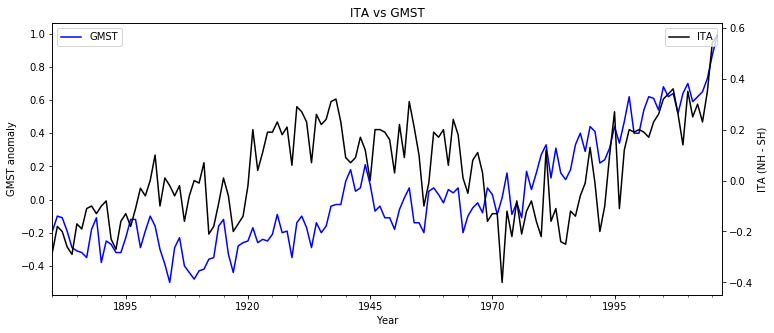

In [71]:
plt.figure(figsize=(12,5))

ax1 = df_gmst['J-D'].plot(color='blue', label='GMST')
ax2 = df_ita.plot(color='black', secondary_y=True, label='ITA')  # 

ax1.set_ylabel('GMST anomaly')
ax2.set_ylabel('ITA (NH - SH)')

ax2.legend(loc=1)
ax1.legend(loc=2)

plt.title('ITA vs GMST')
plt.show()

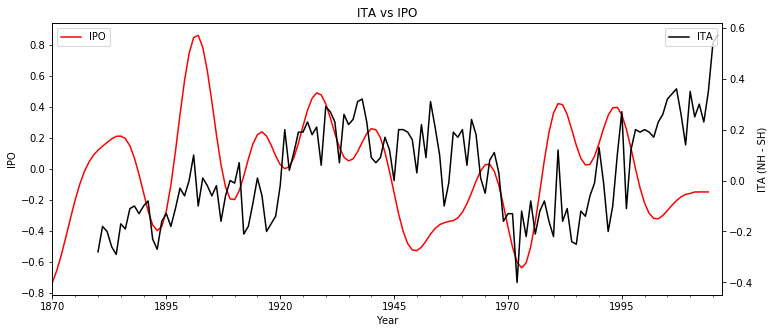

In [73]:
plt.figure(figsize=(12,5))

ax1 = df_ipo['Annual'].plot(color='red', label='IPO')
ax2 = df_ita.plot(color='black', secondary_y=True, label='ITA')  # 

ax1.set_ylabel('IPO')
ax2.set_ylabel('ITA (NH - SH)')

ax2.legend(loc=1)
ax1.legend(loc=2)

plt.title('ITA vs IPO')
plt.show()